### KNN Algorithm

**The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems.While the KNN algorithm can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.Let us try to implement this in Python code with Iris dataset**

In [1]:
import sklearn
sklearn.__version__

'1.2.2'

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

dataset = datasets.load_iris()

C:\Users\ashis\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**1.2 Check the Iris dataset and understand the structure of dataset. Is it Structured, Unstructured or Semi Structured?**

In [2]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### 1.3 Retrieve data, fearure_names, target, target_names into seperate variables. We will use them in next task

In [3]:
dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Task 2:

#### 2.1 Convert the dataset to a structured form using pd.DataFrame(). Read Documentation for more details here:

**https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html**

In [7]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

#### 2.2 Check the shape and head of dataframe

In [8]:
df.shape

(150, 5)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Note from dataset.target_names that:**
##### target = 0 --> setosa
##### target = 1 --> versicolor
##### target = 2 --> virginica

#### 2.3 Now that we know the above, Create a additional column named "Species" that would hold above values based on target values

In [10]:
species_dict = {0:'setosa',1:'versicolor',2:'virginica'}

In [11]:
df['Species'] = df['target'].replace(species_dict)

#### 2.4 Use describe() to check basic stats of the dataset

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Task 3:
#### 3.1 Create a pair pot on features. We ignore warnings just to make it look cleaner. (Import necessary libraries)

<Figure size 640x480 with 0 Axes>

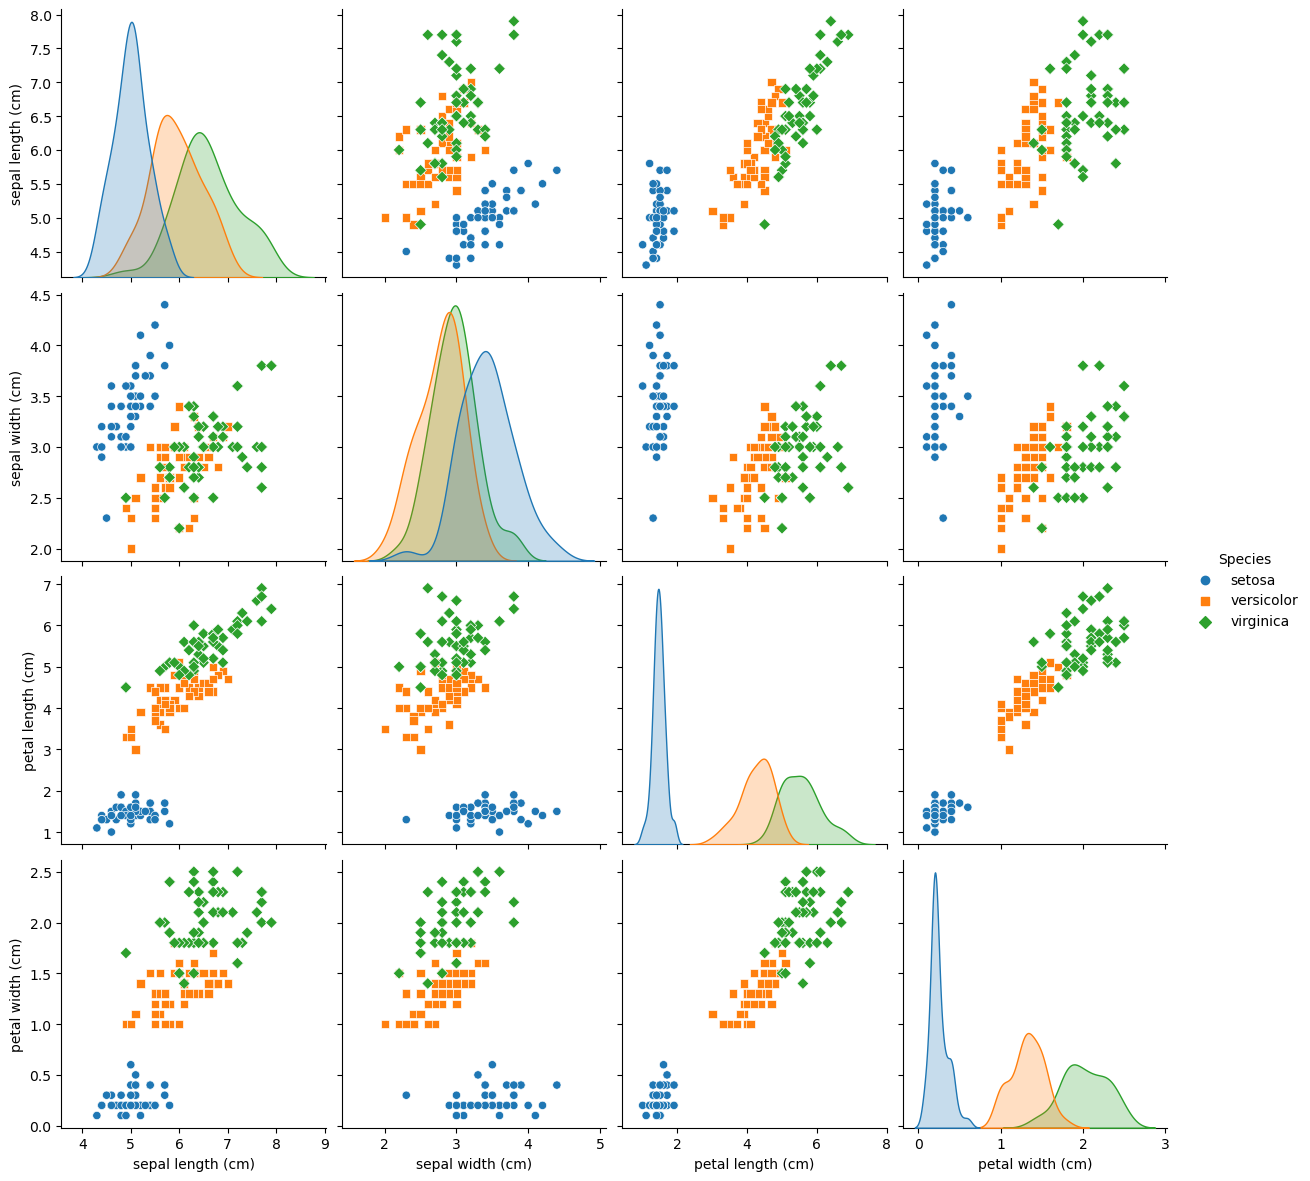

In [13]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure()
sns.pairplot(df.drop('target',axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

#### 3.2 Create a box plot on features

<Figure size 640x480 with 0 Axes>

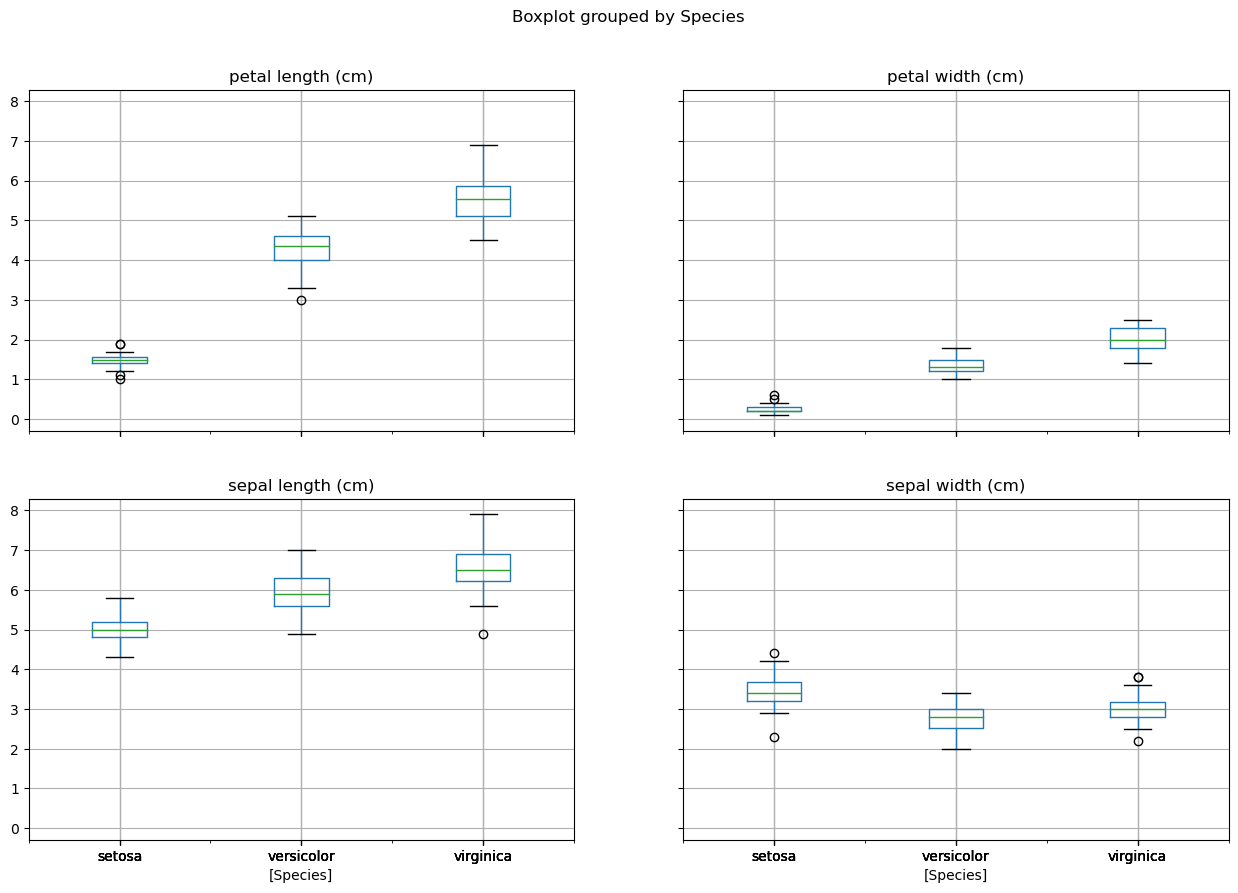

In [14]:
plt.figure()
df.drop('target',axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

#### Note the difference in magnitutes of different features above. It's a good idea in general to standardize the data to bring everything at a same scale. To put it simply, yes, feature scaling is crucial for the KNN algorithm, as it helps in preventing features with larger magnitudes from dominating the distance calculations. We will do that after we split the data. 

### Task 4: 

#### 4.1 Identify your X and y before splitting

In [15]:
feature_columns = df.columns[:-2]
X = df[feature_columns].values
y = df['target'].values

#### 4.2 Split the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Task 5:
#### 5.1 Let's start scaling the data in order to bring all the features at same scale. First import StandardScaler() from sklearn.preprocessing.

In [17]:
from sklearn.preprocessing import StandardScaler

#### 5.2 Define the StandardScaler object and fit on X_train. Then do a transform to get X_train_scaled. Note that .fit() will calculate the mean and standard deviation of all features in X_train. Then .transform will scale using those values

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

##### Note that we have transformed the training data. Now, when we test our model we need to make sure we transform the test data using the same scaler object as above.

### Task 6:
#### 6.1 Implement the KNN algorithm. Import required libraies. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


#### 6.2  Instantiate the learning model with k=3. We will find best k later.

In [20]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 6.3 Now predict on the test data. Remember we need to transform the X_test first.

In [21]:
X_test_scaled = scaler.transform(X_test)
pred = classifier.predict(X_test_scaled)

#### 6.4 Calculate the model accuracy and confusion matrix

In [22]:
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [23]:
accuracy = accuracy_score(y_test, pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


### Task 7: 
#### 7.1 Let's try to find the best k. We use cross-validation to do that. 

**The basic idea behind cross-validation is to partition the dataset into subsets, train the model on some of these subsets, and evaluate it on the remaining subset(s). This process is repeated multiple times, using different partitions each time. The performance metrics obtained from each iteration are then averaged to obtain a final performance estimate.**

**There are several types of cross-validation techniques, with k-fold cross-validation being one of the most commonly used. In k-fold cross-validation:**

**The dataset is divided into k equal-sized folds.
The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, each time using a different fold as the validation set.
The performance scores from each fold are averaged to obtain a final performance estimate. Read more below:**

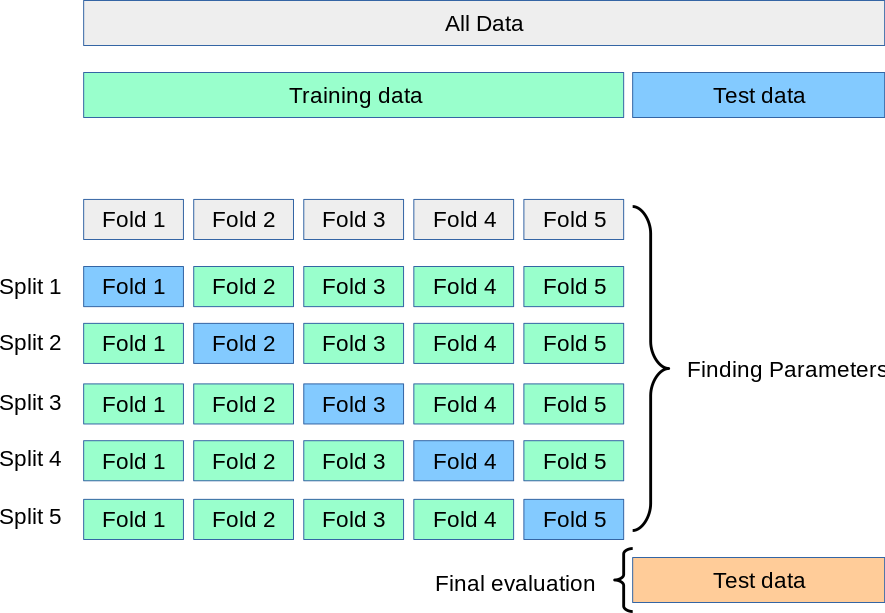

**https://scikit-learn.org/stable/modules/cross_validation.html**

In [24]:
from sklearn.model_selection import cross_val_score
k_list  = list(range(1,50))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#### 7.2 Now that we have cv_scores. Convert them into error_rates and plot them as a line chart having value of k on x axis. 

<Figure size 640x480 with 0 Axes>

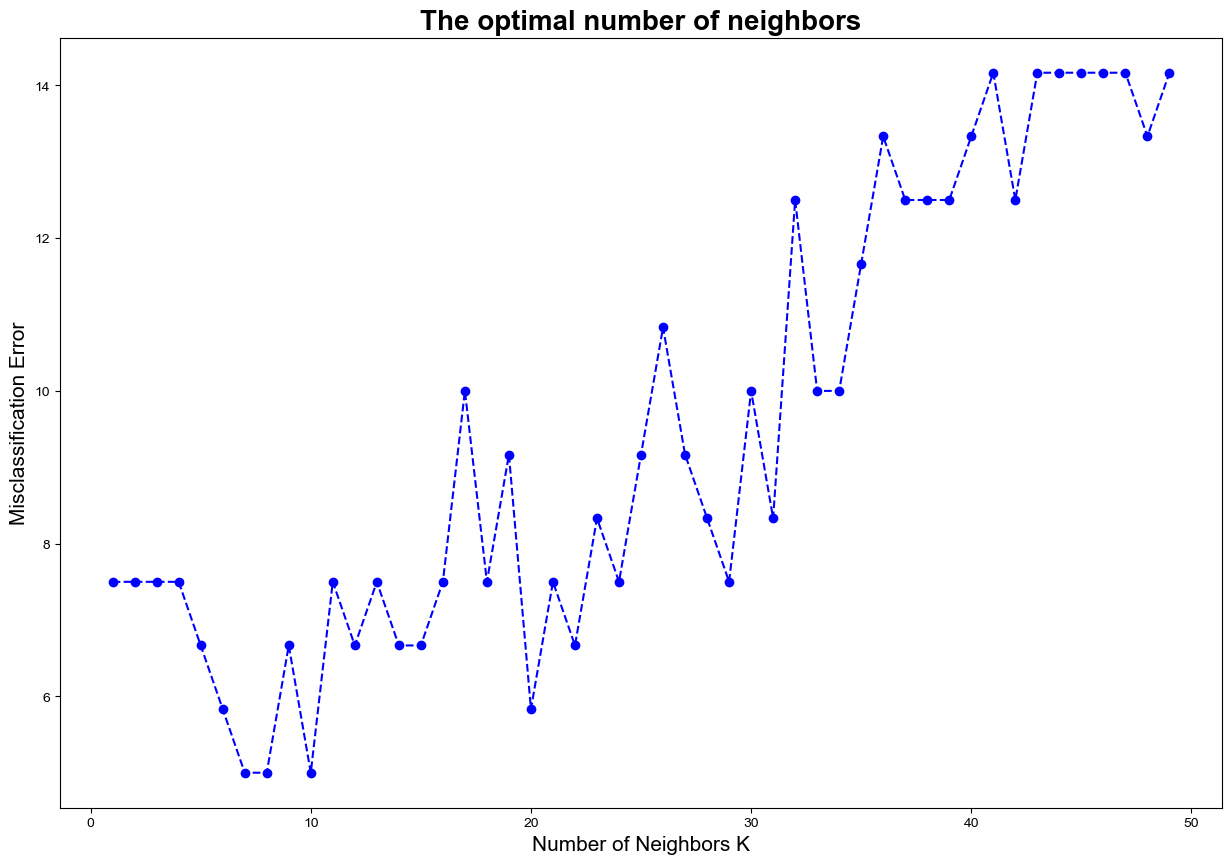

In [25]:
# changing to misclassification error
error_rate = [(1 - x)*100 for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, error_rate,color='blue',linestyle='dashed',marker='o')

plt.show()

#### 7.3 Finally, run the KNN algorithm with the best k you found from chart above.

In [26]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train_scaled, y_train)
pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.
